## 1. Super Bowl
Super Bowl merupakan pertandingan american football yang dilangsungkan pada akhir musim NFL. Super Bowl biasanya dimeriahkan dengan pesta yang megah, serta dengan drama-drama antar fans yang terjadi selama pertandingan.The halftime show merupakan salah satu bagian dari Super Bowl. Dan kali ini kita akan mencari tentang elemen - elemen dalam show tersebut :
* Hasil pertandingan yang paling extreme ?
* Bagaimana pengaruh pertandingan pada penonton TV?
* Bagaiman perkembangan penonton TV, TV rating, dan biaya iklan dari waktu ke waktu?
* Siapa musisi paling produktif dalam hal pertunjukan di halftime show?

In [1]:
# Import pandas
import pandas as pd

# Memanggil dataset
super_bowls = pd.read_csv('datasets/super_bowls.csv')
tv = pd.read_csv('datasets/tv.csv')
halftime_musicians = pd.read_csv('datasets/halftime_musicians.csv')

# Menampilkan baris awal ada dataset
display(super_bowls.head())
display(tv.head())
display(halftime_musicians.head())

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
1,2017-02-05,51,NRG Stadium,Houston,Texas,70807,New England Patriots,34,Tom Brady,NaN,Bill Belichick,Atlanta Falcons,28,Matt Ryan,NaN,Dan Quinn,62,6
2,2016-02-07,50,Levi's Stadium,Santa Clara,California,71088,Denver Broncos,24,Peyton Manning,NaN,Gary Kubiak,Carolina Panthers,10,Cam Newton,NaN,Ron Rivera,34,14
3,2015-02-01,49,University of Phoenix Stadium,Glendale,Arizona,70288,New England Patriots,28,Tom Brady,NaN,Bill Belichick,Seattle Seahawks,24,Russell Wilson,NaN,Pete Carroll,52,4
4,2014-02-02,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35


,super_bowl,network,avg_us_viewers,total_us_viewers,rating_household,share_household,rating_18_49,share_18_49,ad_cost
0,52,NBC,103390000,NaN,43.1,68,33.4,78.0,5000000
1,51,Fox,111319000,172000000.0,45.3,73,37.1,79.0,5000000
2,50,CBS,111864000,167000000.0,46.6,72,37.7,79.0,5000000
3,49,NBC,114442000,168000000.0,47.5,71,39.1,79.0,4500000
4,48,Fox,112191000,167000000.0,46.7,69,39.3,77.0,4000000


,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
1,52,University of Minnesota Marching Band,1.0
2,51,Lady Gaga,7.0
3,50,Coldplay,6.0
4,50,Beyoncé,3.0


## 2. Mencatat Masalah Yang Ada Dalam Dataset
Berdasarkan hasil menampilkan baris awal dataset, diketahui bahwa dalam data Super Bowl terdapat missing value pada kolom quaterback, yaitu <code>qb_winner_2</code> dan <code>qb_loser_2</code>.Kemudian Dari data TV terdapat missing value pada kolom <code>total_us_viewers</code> baris pertama. Dan untuk data Half Time Musician terlihat belum ada. 

Untuk lebih memastikan kita perlu mencari tahu info dari data yang digunakan.

In [2]:
super_bowls.info()
print('\n')
tv.info()
print('\n')
halftime_musicians.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            52 non-null     object
 1   super_bowl      52 non-null     int64 
 2   venue           52 non-null     object
 3   city            52 non-null     object
 4   state           52 non-null     object
 5   attendance      52 non-null     int64 
 6   team_winner     52 non-null     object
 7   winning_pts     52 non-null     int64 
 8   qb_winner_1     52 non-null     object
 9   qb_winner_2     2 non-null      object
 10  coach_winner    52 non-null     object
 11  team_loser      52 non-null     object
 12  losing_pts      52 non-null     int64 
 13  qb_loser_1      52 non-null     object
 14  qb_loser_2      3 non-null      object
 15  coach_loser     52 non-null     object
 16  combined_pts    52 non-null     int64 
 17  difference_pts  52 non-null     int64 
dtypes: int64(6),

## 3. Distribusi Combined Point
Untuk data Super Bowl missing data yang ditemukan masih sama, yaitu pada kolom <code>qb_winner2</code> dan <code>qb_loser2</code>.

Untuk data TV ternyata banyak terjadi missing value selain dari kolom <code>total_us_viewers</code>. Kolom-kolom tersebut adalah  <code>share_18_49</code> dan <code>rating</code>.

Untuk data halftime show, missing value ditemukan pada kolom  <code>num_songs</code>.

Lalu bagaimana cara mengatasi missing value tersebut? Dan kenapa hal tersebut bisa terjadi? Pasti banyak alasan yang melatarbelakanginya. Mungkin kita bisa mengatasinya dengan cara menonton semua siaran ulangnya, tapi hal itu akan menghabiskan banyak waktu, dan terkesan lucu. Oleh karena itu mari kita visualisasikan, untuk mengetahui persebaran missing value tersebut. Dimulai dari visualisasi combined point pada Super Bowl

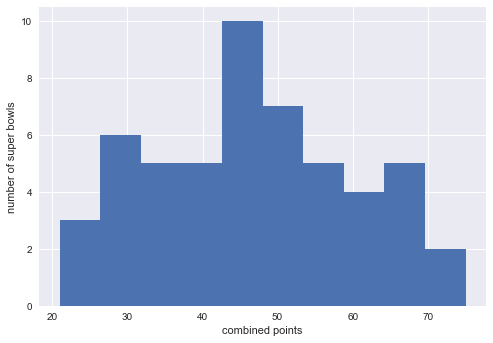

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
23,1995-01-29,29,Joe Robbie Stadium,Miami Gardens,Florida,74107,San Francisco 49ers,49,Steve Young,NaN,George Seifert,San Diego Chargers,26,Stan Humphreys,NaN,Bobby Ross,75,23


,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
43,1975-01-12,9,Tulane Stadium,New Orleans,Louisiana,80997,Pittsburgh Steelers,16,Terry Bradshaw,NaN,Chuck Noll,Minnesota Vikings,6,Fran Tarkenton,NaN,Bud Grant,22,10
45,1973-01-14,7,Memorial Coliseum,Los Angeles,California,90182,Miami Dolphins,14,Bob Griese,NaN,Don Shula,Washington Redskins,7,Bill Kilmer,NaN,George Allen,21,7
49,1969-01-12,3,Orange Bowl,Miami,Florida,75389,New York Jets,16,Joe Namath,NaN,Weeb Ewbank,Baltimore Colts,7,Earl Morrall,Johnny Unitas,Don Shula,23,9


In [11]:
# import matplotlib
import matplotlib.pyplot as plt

# Melakukan pengaturan style
plt.style.use('seaborn')

# Melakukan plot histogram
plt.hist(super_bowls['combined_pts'])
plt.xlabel('combined points')
plt.ylabel('number of super bowls')
plt.show()

# Nilai tertinggi dan terendah combined point
display(super_bowls[super_bowls['combined_pts'] > 70])
display(super_bowls[super_bowls['combined_pts'] < 25])

## 4. Distribusi Point Different

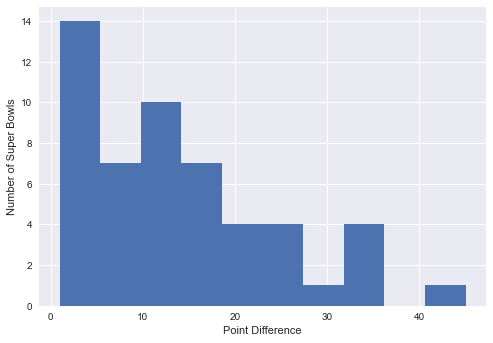

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
27,1991-01-27,25,Tampa Stadium,Tampa,Florida,73813,New York Giants,20,Jeff Hostetler,NaN,Bill Parcells,Buffalo Bills,19,Jim Kelly,NaN,Marv Levy,39,1


,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
28,1990-01-28,24,Louisiana Superdome,New Orleans,Louisiana,72919,San Francisco 49ers,55,Joe Montana,NaN,George Seifert,Denver Broncos,10,John Elway,NaN,Dan Reeves,65,45
32,1986-01-26,20,Louisiana Superdome,New Orleans,Louisiana,73818,Chicago Bears,46,Jim McMahon,NaN,Mike Ditka,New England Patriots,10,Tony Eason,Steve Grogan,Raymond Berry,56,36


In [18]:
# plot histogram different points
plt.hist(super_bowls.difference_pts)
plt.xlabel('Point Difference')
plt.ylabel('Number of Super Bowls')
plt.show()

# Menampilkan closest game dan blowout terbesar
display(super_bowls[super_bowls.difference_pts == 1])
display(super_bowls[super_bowls.difference_pts > 35])